In [0]:
#!pip install vega_datasets

In [4]:
#from vega_datasets import data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')

In [6]:
iris = pd.read_csv('iris.csv')
iris.head()
features = np.array(iris).shape[1] - 1
print("Features: " + str(features))
print(iris.iloc[0, :])
X = iris.iloc[:, :4]
y = iris["variety"]
y_one_hot_encoded = pd.get_dummies(y)
del iris["variety"]
iris = pd.concat([X, y_one_hot_encoded], axis = 1)
iris.describe()

Features: 4
sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object


,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


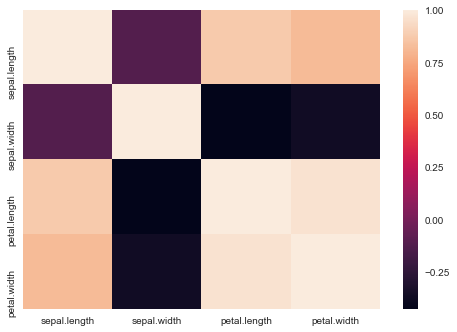

In [7]:
corr = X.corr()
sns.heatmap(corr)

In [8]:
X.shape

(150, 4)

E:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
E:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
E:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
E:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


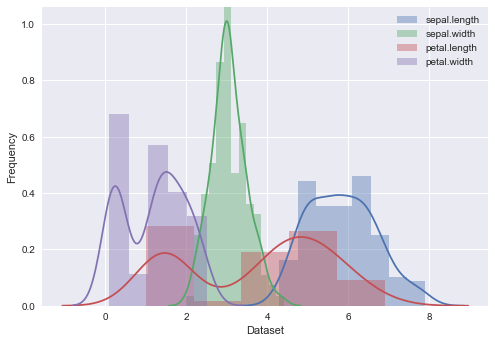

In [9]:
sns.set(color_codes=True)
for i in X.columns:
    sns.distplot(X[i], label=i)
plt.legend()
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.show()

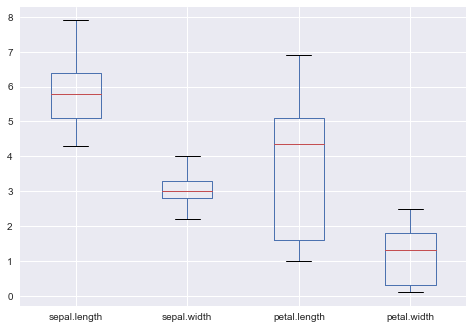

In [10]:
X.boxplot()

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
X_train = np.array(X.iloc[:140, :])
y_train = np.array(y.iloc[:140])
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
test_data = np.array(X.iloc[141:,:])

In [14]:
y_pred = model.predict(test_data.reshape(test_data.shape[0], 4))

In [15]:
y_orig = y.iloc[141:]
y_orig = np.array(y_orig)

In [16]:
y_orig[1], y_pred[1]

('Virginica', 'Virginica')